# Alcohol Consumption Analysis
This notebook will be an exploratory analysis of two different datasets. One dataset has information about alcohol consumption by country which is the dataset we will primarily focus on for this analysis. The other dataset has information about life-expectancy by country. We will take a look at the data within each dataset, create some visualizations to enhance our understanding of the data, and use life expectancy dataset to see if there is any correlation with a country's alcohol consumption and life expectancy.

### Data Source

Data obtained from UNCC Data Science and Business Analytics: https://data.world/uncc-dsba/dsba-6100-fall-2016

### Importing and Reviewing the Datasets

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set(style='whitegrid')

Importing the drinks.csv dataset into a pandas dataframe:

In [2]:
df = pd.read_csv('drinks.csv')
df = df.replace('?', np.NaN)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 192 non-null    object 
 2   spirit_servings               192 non-null    object 
 3   wine_servings                 192 non-null    object 
 4   total_litres_of_pure_alcohol  0 non-null      float64
dtypes: float64(1), object(4)
memory usage: 7.7+ KB


dataset preview:

In [4]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,NaN
1,Albania,89,132,54,NaN
2,Algeria,25,0,14,NaN
3,Andorra,245,138,312,NaN
4,Angola,217,57,45,NaN


Moving on to the life expectancy dataset:

In [5]:
df_le = pd.read_csv('lifeexpectancy.csv')

In [6]:
df_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6408 entries, 0 to 6407
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   GhoCode                        6408 non-null   object 
 1   GhoDisplay                     6408 non-null   object 
 2   PublishStateCode               6408 non-null   object 
 3   PublishStateDisplay            6408 non-null   object 
 4   YearCode                       6408 non-null   int64  
 5   YearDisplay                    6408 non-null   int64  
 6   RegionCode                     6408 non-null   object 
 7   RegionDisplay                  6408 non-null   object 
 8   WorldBankIncomeGroupGroupCode  5244 non-null   object 
 9   WorldBankIncomeGroupDisplay    5244 non-null   object 
 10  CountryCode                    6408 non-null   object 
 11  CountryDisplay                 6408 non-null   object 
 12  SexCode                        6408 non-null   o

dataset preview

In [7]:
df_le.head()

,GhoCode,GhoDisplay,PublishStateCode,PublishStateDisplay,YearCode,YearDisplay,RegionCode,RegionDisplay,WorldBankIncomeGroupGroupCode,WorldBankIncomeGroupDisplay,CountryCode,CountryDisplay,SexCode,SexDisplay,DisplayValue,Numeric
0,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2013,2013,EMR,Eastern Mediterranean,NaN,NaN,AFG,Afghanistan,BTSX,Both sexes,61,61.25205
1,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2013,2013,EMR,Eastern Mediterranean,NaN,NaN,AFG,Afghanistan,FMLE,Female,62,61.97733
2,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2013,2013,EMR,Eastern Mediterranean,NaN,NaN,AFG,Afghanistan,MLE,Male,61,60.51228
3,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2012,2012,EMR,Eastern Mediterranean,WB_LI,Low_income,AFG,Afghanistan,BTSX,Both sexes,60,60.00000
4,WHOSIS_000001,Life expectancy at birth (years),PUBLISHED,Published,2012,2012,EMR,Eastern Mediterranean,WB_LI,Low_income,AFG,Afghanistan,FMLE,Female,61,61.00000


### Data Cleaning & Transformation

Upon importing the data, there's a few things that need to be done in order to get the drinks dataframe ready for analysis:
- Convert columns to numeric values
- Fill Missing Values (will fill column mean)
- Drop total_litres_of_pure_alcohol column as the data is missing entirely
- Create a new column showing sum of all alcohol servings per country

In [8]:
# Convert columns to numeric values
df[['beer_servings', 'spirit_servings', 'wine_servings']] = df[['beer_servings', 'spirit_servings', 'wine_servings']].apply(pd.to_numeric)

# Fill missing values with mean of column
df['beer_servings'].fillna(value=df['beer_servings'].mean(), inplace=True)
df['spirit_servings'].fillna(value=df['spirit_servings'].mean(), inplace=True)
df['wine_servings'].fillna(value=df['wine_servings'].mean(), inplace=True)

# Drop total litres column
df = df.drop(columns=['total_litres_of_pure_alcohol'])

# Add a new columns showing total alcohol servings
df['total_servings'] = df['beer_servings'] + df['spirit_servings'] + df['wine_servings']

dataset preview (after changes)

In [9]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_servings
0,Afghanistan,0.0,0.0,0.0,0.0
1,Albania,89.0,132.0,54.0,275.0
2,Algeria,25.0,0.0,14.0,39.0
3,Andorra,245.0,138.0,312.0,695.0
4,Angola,217.0,57.0,45.0,319.0


For the life Expectancy dataframe, we will transform the dataframe to calculate mean life expectancy by country.

In [10]:
df_le = df_le[df_le['GhoDisplay']=='Life expectancy at birth (years)'].groupby(
    ['CountryDisplay'])['Numeric'].mean().reset_index()
df_le = df_le.rename(
    columns={'CountryDisplay': 'country', 'Numeric': 'life_expectancy'})

The transformed dataframe preview:

In [11]:
df_le.head(10)

,country,life_expectancy
0,Afghanistan,56.311805
1,Albania,71.871584
2,Algeria,70.216262
3,Andorra,80.576820
4,Angola,47.852151
5,Antigua and Barbuda,73.595177
6,Argentina,74.903068
7,Armenia,70.046697
8,Australia,80.647330
9,Austria,78.901652


Lastly, in order to join the data containing life expectancy to the drinks dataset containing alcohol consumption by country, we need to check that the country labels between the two datasets all will match or the join won't work properly. To do this, the country labels for each dataset will be added to two distinct sets (list-like objects). Adding country labels to a set will ensure we are only left with unique values. The sets can then be compared to identify differences:

In [12]:
# Set containing labels for life expectancy dataset
le_set = set(df_le['country'].tolist())

# Set containing country labels for drinks dataset
drinks_set = set(df['country'].tolist())

# Check for differences
diff = drinks_set - le_set

The following list of countries exists in the drinks dataset but not in life expectancy dataset

In [13]:
for i in diff: print(i)

Trinidad & Tobago
Syria
St. Kitts & Nevis
Cote d'Ivoire
DR Congo
South Korea
Bolivia
St. Lucia
Timor-Leste
United Kingdom
Guinea-Bissau
Venezuela
Vietnam
Sao Tome & Principe
North Korea
Laos
Iran
USA
St. Vincent & the Grenadines
Brunei
Antigua & Barbuda
Tanzania
Micronesia
Macedonia
Moldova
Bosnia-Herzegovina


I looked up these countries in the life_expectancy dataset and found there were slight variations in the wording of the name. To rectify the country labeling, the following dictionary was created with the matching country name pairs between the 2 datasets. This dictionary will be used used to replace all instances of key with corresponding values in the drinks dataframe.

In [14]:
# Dictionary containing country names
country_name_corrections = {
    'Antigua & Barbuda': 'Antigua and Barbuda',
    'Bolivia': 'Bolivia (Plurinational State of)',
    'Bosnia-Herzegovina': 'Bosnia and Herzegovina',
    'Brunei': 'Brunei Darussalam', 
    "Cote d'Ivoire": "Côte d'Ivoire",
    'DR Congo': 'Congo',
    'Guinea-Bissau': 'Guinea_Bissau',
    'Iran': 'Iran (Islamic Republic of)',
    'Laos': "Lao People's Democratic Republic",
    'Micronesia': 'Micronesia (Federated States of)',
    'Macedonia': 'The former Yugoslav republic of Macedonia',
    'Moldova': 'Republic of Moldova',
    'North Korea': 'Republic of Korea',
    'Sao Tome & Principe': 'Sao Tome and Principe',
    'South Korea': "Democratic People's Republic of Korea",
    'St. Kitts & Nevis': 'Saint Kitts and Nevis',
    'St. Lucia': 'Saint Lucia',
    'St. Vincent & the Grenadines': 'Saint Vincent and the Grenadines',
    'Syria': 'Syrian Arab Republic',
    'Tanzania': 'United Republic of Tanzania',
    'Timor-Leste': 'Timor_Leste',
    'Trinidad & Tobago': 'Trinidad and Tobago',
    'USA': 'United States of America',
    'United Kingdom': 'United Kingdom of Great Britain and Northern Ireland',
    'Venezuela': 'Venezuela (Bolivarian Republic of)',
    'Vietnam': 'Viet Nam',
    }

# Replace country labels in life expectancy dataset to match with drinks dataset
df = df.replace({'country': country_name_corrections})

With the country labels now consistent, the two dataframes are merged using an inner join.

In [15]:
df = pd.merge(df, df_le, how='inner')

preview of merged dataframe:

In [16]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_servings,life_expectancy
0,Afghanistan,0.0,0.0,0.0,0.0,56.311805
1,Albania,89.0,132.0,54.0,275.0,71.871584
2,Algeria,25.0,0.0,14.0,39.0,70.216262
3,Andorra,245.0,138.0,312.0,695.0,80.576820
4,Angola,217.0,57.0,45.0,319.0,47.852151


### Data Visualizations & Insights
Now that the datasets have been cleaned up and transformed as needed, we can dive in and create visualizations to understand the data better.

Distribution of Life Expectancy & Alcohol Servings Consumed (histograms)

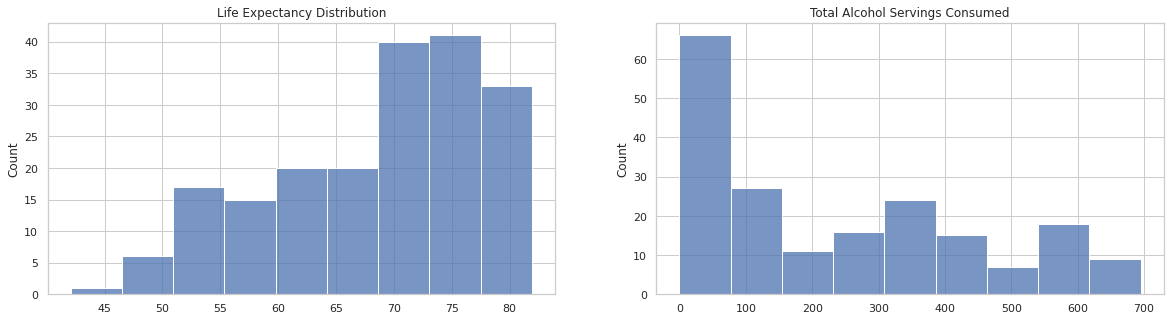

In [17]:
fig, ax =plt.subplots(1,2, figsize=(20, 5))
sns.histplot(x='life_expectancy', data=df, ax=ax[0]).set(xlabel=None, title = 'Life Expectancy Distribution') 
sns.histplot(x='total_servings', data=df, ax=ax[1]).set(xlabel=None, title = 'Total Alcohol Servings Consumed') 
plt.show()

World Life Expectancy skews towards 70-75 years old. Alcohol servings consumed skews less than 100.

Plotting life expectancy compared to total servings of alcohol

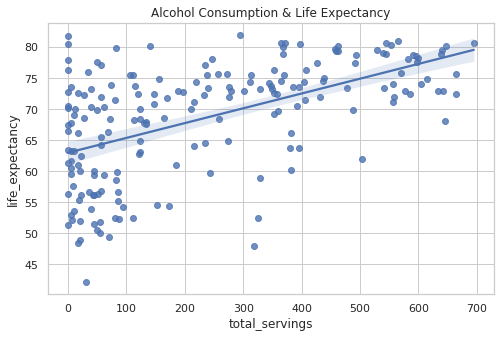

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
sns.regplot(x='total_servings', y='life_expectancy', data=df, ax=ax).set_title('Alcohol Consumption & Life Expectancy')
plt.show()

There is a surprising relationship between alcohol consumption and life expectancy. In fact, the data shows a weakly positive correlation between life expectancy and alcohol consumption. Albeit, the weak correlation indicates that other factors are likely contributing to differences in life expectancy, and further analysis is warranted before making and conclusive statements.

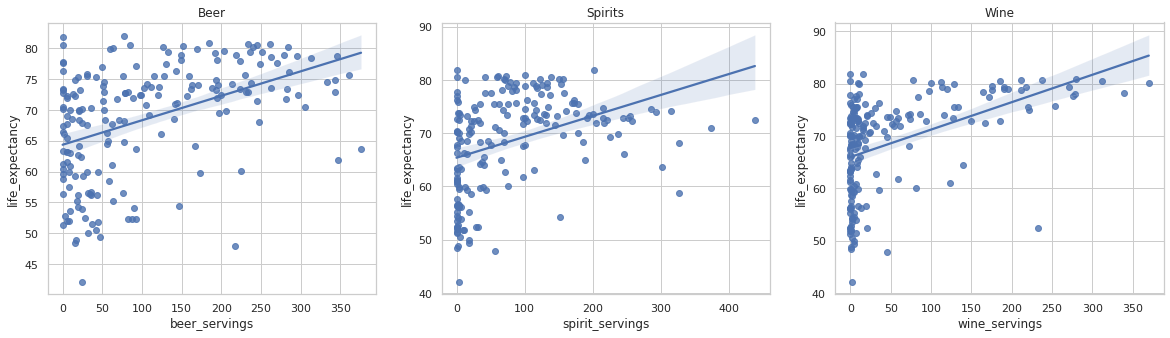

In [19]:
# create subplots to display correlation by alcohol type
fig, ax =plt.subplots(1,3, figsize=(20, 5))
sns.regplot(x='beer_servings', y='life_expectancy', data=df, ax=ax[0]).set_title('Beer')
sns.regplot(x='spirit_servings', y='life_expectancy', data=df, ax=ax[1]).set_title('Spirits')
sns.regplot(x='wine_servings', y='life_expectancy', data=df, ax=ax[2]).set_title('Wine')
plt.show()

As can be seen above, the relationships are similar when broken down by alcohol type.

Top 10 countries by alcohol total serving size:

In [20]:
df.sort_values(by=['total_servings'], ascending=False).head(10)

,country,beer_servings,spirit_servings,wine_servings,total_servings,life_expectancy
3,Andorra,245.0,138.0,312.0,695.0,80.576820
67,Grenada,199.0,438.0,28.0,665.0,72.434296
46,Czech Republic,361.0,170.0,134.0,665.0,75.636544
60,France,127.0,151.0,370.0,648.0,80.155273
141,Russian Federation,247.0,326.0,73.0,646.0,68.078784
97,Lithuania,343.0,244.0,56.0,643.0,72.878013
98,Luxembourg,236.0,133.0,271.0,640.0,79.443270
64,Germany,346.0,117.0,175.0,638.0,78.814174
74,Hungary,234.0,215.0,185.0,634.0,72.871278
137,Poland,343.0,215.0,56.0,614.0,74.793764


The above table shows the 10 countries with gihest alcohol consumption. However, it would be difficult to compare consumption habits of all countries in a table as there are nearly 200 countries represented in this dataset. To overcome this, we will plot alcohol consumption levels on a world map in the next section.

### Geospatial Visualization
The how each country's alcohol consumtion looks like compared to others, we can create a visualization using a world map. Each country will be shaded a color scale dependent on alcohol consumption. To do this we will use the Geoplot python library.We will import it along with the pycountry library which will be used shortly.

In [21]:
# Import required libraries
import geoplot as gplt
import geopandas as gpd
import pycountry

In [22]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

To plot the data we will need the 3 digit country code. This can be obtained with pycountry library that was just imported. The below custom function will take in country name as parameter and provide appropriate 3-character country code.

In [23]:
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE

Applying the function to the dataframe:

In [24]:
df['CODE']=alpha3code(df.country)
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_servings,life_expectancy,CODE
0,Afghanistan,0.0,0.0,0.0,0.0,56.311805,AFG
1,Albania,89.0,132.0,54.0,275.0,71.871584,ALB
2,Algeria,25.0,0.0,14.0,39.0,70.216262,DZA
3,Andorra,245.0,138.0,312.0,695.0,80.576820,AND
4,Angola,217.0,57.0,45.0,319.0,47.852151,AGO


We do have missing values however:

In [25]:
for i in df[df['CODE']=='None']['country'].tolist(): print(i)

Bolivia (Plurinational State of)
Czech Republic
Guinea_Bissau
Iran (Islamic Republic of)
The former Yugoslav republic of Macedonia
Micronesia (Federated States of)
Republic of Moldova
Republic of Korea
Democratic People's Republic of Korea
Swaziland
United Republic of Tanzania
Timor_Leste
United Kingdom of Great Britain and Northern Ireland
United States of America
Venezuela (Bolivarian Republic of)


Again I created a dictionary with appropriate country codes for these missing values. Codes were obtained from https://www.iban.com/country-codes

In [26]:
code_corr = {
    'Bolivia (Plurinational State of)':'BOL',
    'Czech Republic':'CZE',
    'Guinea_Bissau':'GIN',
    'Iran (Islamic Republic of)':'IRN',
    'The former Yugoslav republic of Macedonia':'MKD',
    'Micronesia (Federated States of)':'FSM',
    'Republic of Moldova':'MDA',
    'Republic of Korea':'KOR',
    "Democratic People's Republic of Korea":'PRK',
    'United Republic of Tanzania':'TZA',
    'Timor_Leste':'TLS',
    'United Kingdom of Great Britain and Northern Ireland':'GBR',
    'United States of America':'USA',
    'Venezuela (Bolivarian Republic of)':'VEN',
    'Swaziland':'None'
    }

Applying the corrections to dataframe:

In [27]:
for index, row in df.iterrows():
    if row['CODE'] == 'None':
        df.at[index,'CODE'] = code_corr[row['country']]

Now, we can merge our dataframe with geoplot world dataframe.

In [28]:
# first let us merge gpd data with our dataframe
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# rename the columns so that we can merge with our data
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']

# then merge with our data 
merge=pd.merge(world,df, on='CODE')

With the dataset merged, we can proceed to plot.

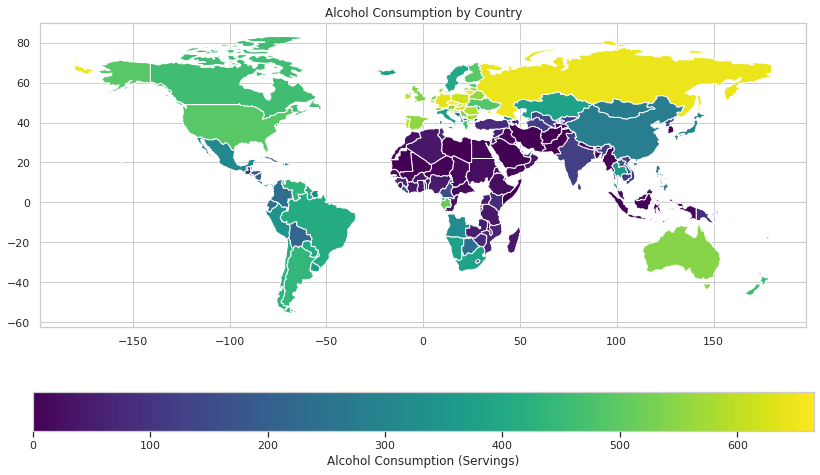

In [29]:
# plot world map
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
merge.plot(column='total_servings',
           ax=ax,
           legend=True,
           cmap='viridis',
           legend_kwds={'label': 'Alcohol Consumption (Servings)',
                        'orientation': 'horizontal'}).set_title('Alcohol Consumption by Country')
plt.show()

At last we can see a world map showing alcohol consumption by country. 

Northern Hemisphere countries tend to have higher alcohol consumption with Australia being the exception. Africa and Southeast Asia especially have relatively low alcohol consumption while Russia has a very high consumption rate.